In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
def wrangle(filename):
    #Import data into CSV
    df = pd.read_csv(filename)

    #Drop multicollinrarity colums
    df.drop(columns=["cigsPerDay", "sysBP"], inplace=True)


    return df

In [6]:
df = wrangle("heart disease.csv")
df.head()

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4219 non-null   float64
 11  heartRate        4237 non-null   float64
 12  glucose          3850 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 463.7 KB


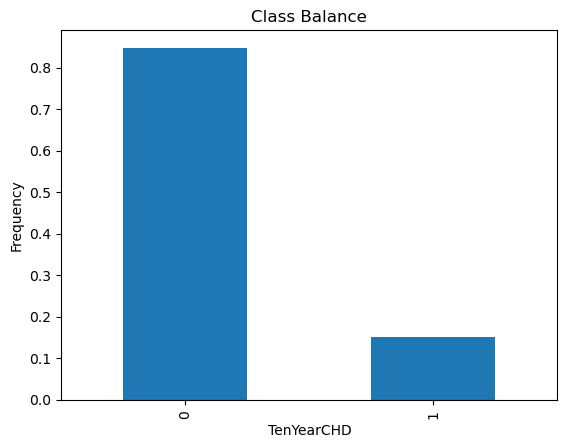

In [8]:
#Plot the class balance
df["TenYearCHD"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="TenYearCHD",
    ylabel="Frequency",
    title = "Class Balance"
);

In [9]:
# Check the percentage of null values in each column
df.isnull().sum() /len(df)

male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64

In [10]:
# multicollinearity between numerical columns
corr = df.select_dtypes("number").drop(columns="TenYearCHD").corr()
corr

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose
male,1.000000,-0.028979,0.017352,0.197596,-0.052506,-0.004546,0.005313,0.015708,-0.070322,0.057933,0.081672,-0.116620,0.006083
age,-0.028979,1.000000,-0.165883,-0.213748,0.122995,0.057655,0.307194,0.101258,0.262131,0.206104,0.135800,-0.012823,0.122256
education,0.017352,-0.165883,1.000000,0.018532,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.062316,-0.137504,-0.054206,-0.035721
currentSmoker,0.197596,-0.213748,0.018532,1.000000,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.107746,-0.167650,0.062356,-0.056826
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,1.000000,0.117365,0.261187,0.052047,0.080558,0.194227,0.100668,0.015233,0.051176
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,0.117365,1.000000,0.074830,0.006949,0.000067,0.045190,0.025891,-0.017676,0.018431
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,0.261187,0.074830,1.000000,0.077808,0.163993,0.615751,0.301318,0.147261,0.086834
diabetes,0.015708,0.101258,-0.038680,-0.044295,0.052047,0.006949,0.077808,1.000000,0.040278,0.050329,0.087036,0.048994,0.617627
totChol,-0.070322,0.262131,-0.023115,-0.046562,0.080558,0.000067,0.163993,0.040278,1.000000,0.165182,0.115767,0.091125,0.046408
diaBP,0.057933,0.206104,-0.062316,-0.107746,0.194227,0.045190,0.615751,0.050329,0.165182,1.000000,0.377588,0.181255,0.061231


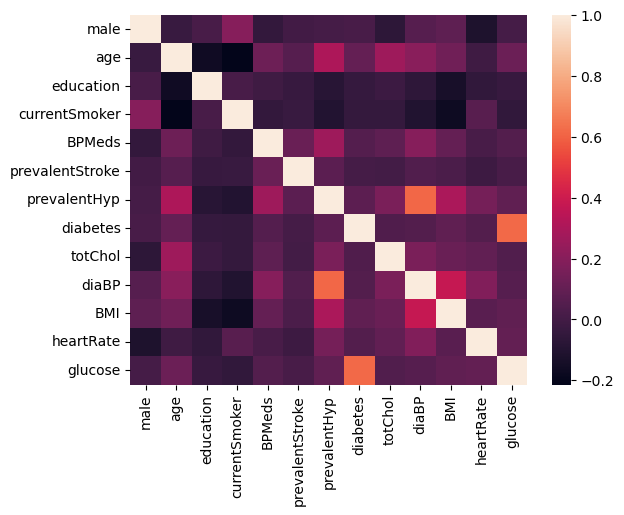

In [11]:
#Plot the correllation using a heatmap
sns.heatmap(corr);

In [12]:
# Split the data into features and target
target = "TenYearCHD"

X = df.drop(columns="TenYearCHD")
y= df[target]

print(f"X.shape:", X.shape)
print(f"y.shape:", y.shape)

X.shape: (4238, 13)
y.shape: (4238,)


In [13]:
# split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:", X_train.shape)
print(f"y_train:", y_train.shape)
print(f"X_test:", X_test.shape)
print(f"y_test:", y_test.shape)

X_train: (3390, 13)
y_train: (3390,)
X_test: (848, 13)
y_test: (848,)


In [14]:
len(X_train + X_test) == len(X)

True

In [15]:
#Split data into training and valication set
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X_train:", X_train.shape)
print(f"y_train:", y_train.shape)
print(f"X_val:", X_val.shape)
print(f"y_val:", y_val.shape)

X_train: (2712, 13)
y_train: (2712,)
X_val: (678, 13)
y_val: (678,)


In [16]:
# Determine the Baseline Accuracy score
y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy Score:", round(y_train.value_counts(normalize=True).max(), 2))

Baseline Accuracy Score: 0.85


In [17]:
model = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(max_depth=2, random_state=42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [18]:
acc_train = model.score(X_train, y_train)
acc_val= accuracy_score(y_val, model.predict(X_val))


print(f"Training Accuracy:", acc_train)
print(f"Validation Accuracy:", acc_val)

Training Accuracy: 0.846976401179941
Validation Accuracy: 0.8510324483775811


In [19]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
tree_depth

2

In [20]:
depth_hyperparams= range(1, 50, 2)

In [21]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        SimpleImputer(), 
        DecisionTreeClassifier(max_depth=d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8455014749262537, 0.8506637168141593, 0.8587758112094396]
Validation Accuracy Scores: [0.8510324483775811, 0.8421828908554573, 0.8348082595870207]


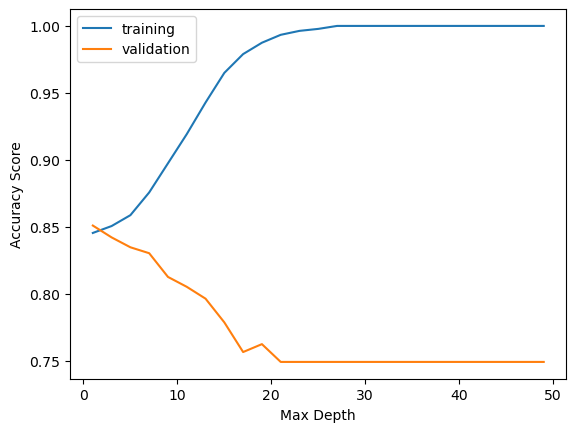

In [22]:
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [23]:
acc_test=model.score(X_test, y_test)
acc_test

0.8525943396226415

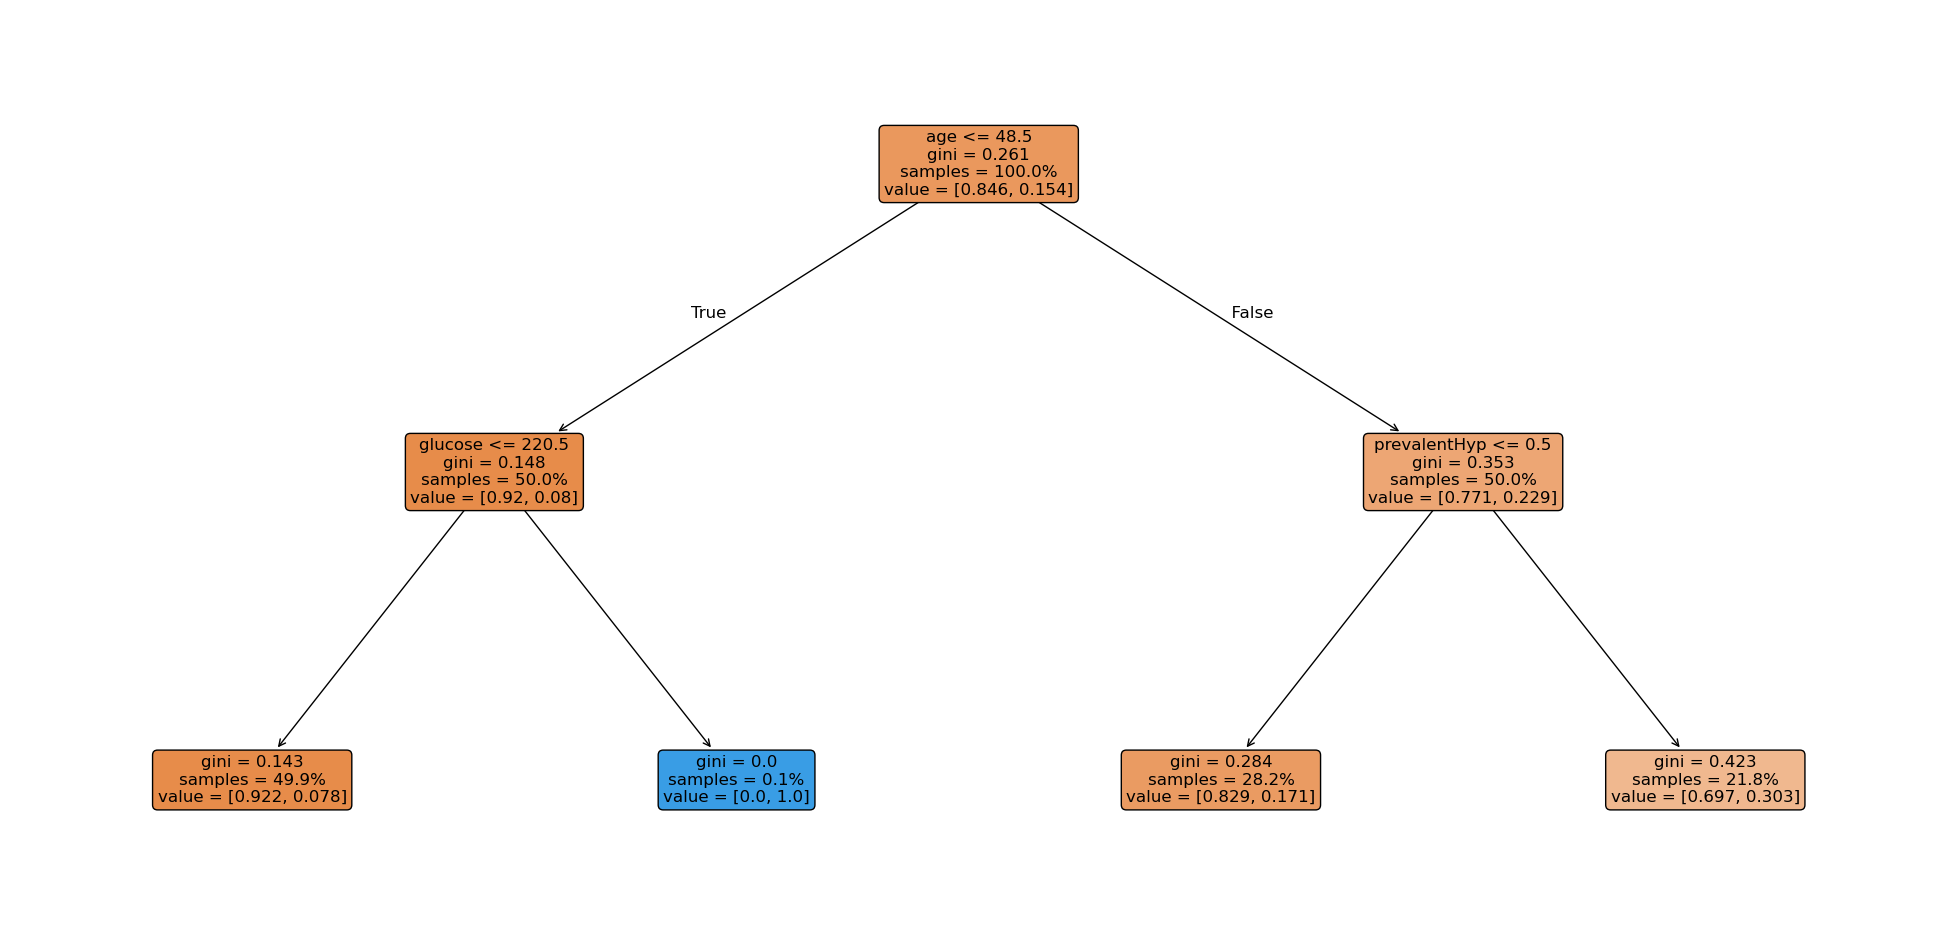

In [24]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=6,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [25]:
importances = model.named_steps["decisiontreeclassifier"].feature_importances_
features= X_train.columns
feat_imp = pd.Series(importances, index= features).sort_values()

In [26]:
feat_imp

male               0.000000
education          0.000000
currentSmoker      0.000000
BPMeds             0.000000
diabetes           0.000000
prevalentStroke    0.000000
diaBP              0.000000
totChol            0.000000
BMI                0.000000
heartRate          0.000000
glucose            0.140605
prevalentHyp       0.242022
age                0.617373
dtype: float64

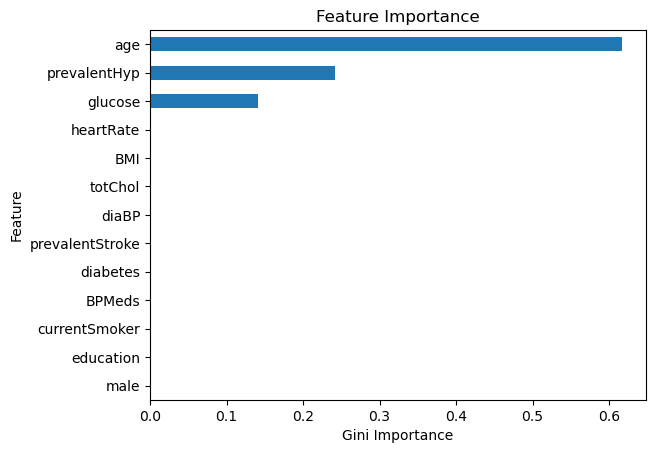

In [27]:
feat_imp.plot(
    kind="barh",
    xlabel= "Gini Importance",
    ylabel= "Feature",
    title="Feature Importance"
);